## Wednesday's task (18.01.2023)

As a reminder the objective of this study is to predict the total claim amount of a customer and study/investigate the impact of the factors (input features) on the target variable(total claim amount). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.colors as mcolors
from scipy.stats import pearsonr
df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

1. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [8]:
df_numerical_features = df.select_dtypes(include='number')
df_categorical_features = df.select_dtypes(include='object')

In [9]:
df_categorical_features

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


2. Now we will try to check the normality of the numerical variables visually: Use seaborn library to construct distribution plots for the numerical variables
   


<AxesSubplot:ylabel='Count'>

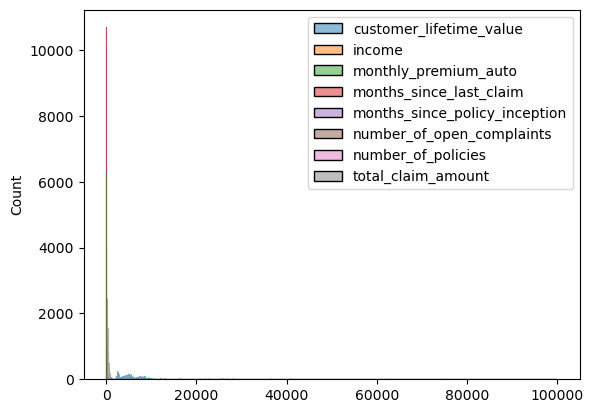

In [56]:
sns.histplot(data=df_numerical_features)  # seaborn

 2b. Use Matplotlib to construct histograms.

(array([[8.4790e+03, 1.5360e+03, 4.5300e+02, 1.5000e+02, 4.6000e+01,
         1.6000e+01, 6.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.2900e+02, 1.8520e+03, 1.3550e+03, 1.1640e+03,
         1.2410e+03, 1.2370e+03, 1.0930e+03, 9.6300e+02, 8.5500e+02],
        [1.0689e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0689e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0689e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0689e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0689e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0689e+04, 0.0000

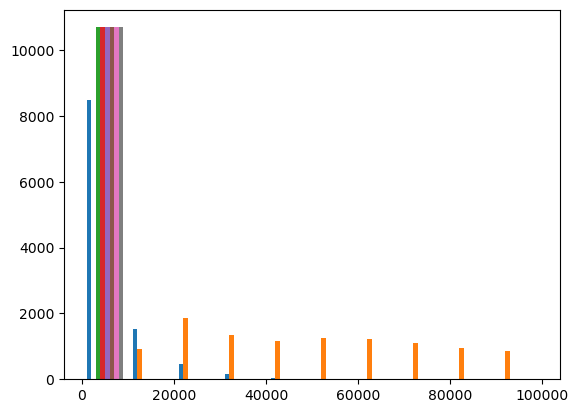

In [57]:
 plt.hist(df_numerical_features) # matplotlib

2c. Do the distributions for different numerical variables look like a normal distribution? Answer: Yes, but a skewed one


3. For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.

In [58]:
correlation = df_numerical_features.corr() # correlation dataset/matrix

4. Plot the Correlation Heatmap.

<AxesSubplot:>

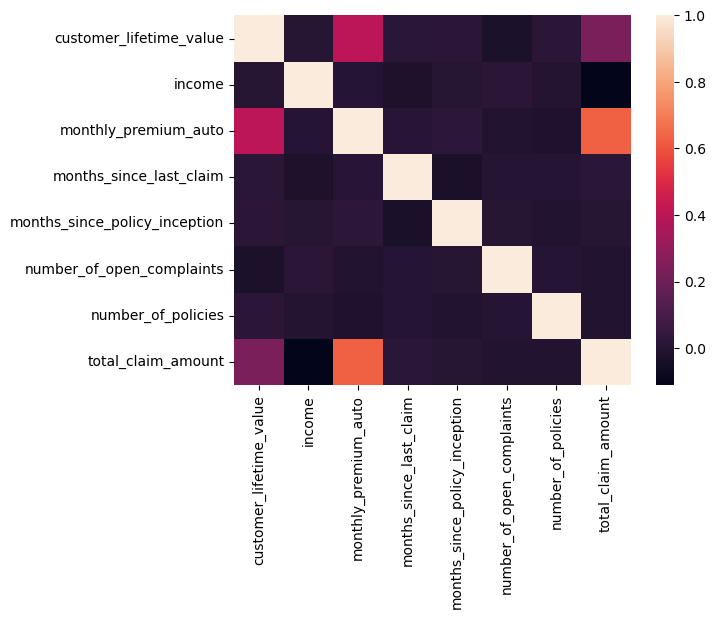

In [59]:
# heatmap
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

5. (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular.

In [60]:
a = len(correlation) # size of the correlation matrix (its is always a square matrix)
# we do not want to drop th features that are shown at the diagonal (with correlation 1), hence the step below with output_mat
output_mat = correlation - np.eye(a) # removing the diagonal of the correlation with ones with a diagonal with all zeros
 
to_drop = [column for column in output_mat.columns if any(output_mat[column] > 0.9)]
print(to_drop) # the result is that nothing needs to be dropped
clean_data = df_numerical_features.drop(labels=to_drop, axis=1)
(clean_data.head())


[]


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
